In [ ]:
#!pip install selenium
from selenium.common.exceptions import NoSuchElementException, ElementClickInterceptedException
from selenium import webdriver
import time
import pandas as pd
import requests
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [65]:
import json
from collections import defaultdict
import numpy as np
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

In [ ]:
from selenium.webdriver.common.by import By

In [ ]:
from bs4 import BeautifulSoup
from selenium import webdriver
import time

PATH = '/chromedriver_mac_arm64/chromedriver'


l=list()
o={}

target_url = "https://www.glassdoor.com/Job/united-states-data-scientist-jobs-SRCH_IL.0,13_IN1_KO14,28_IP7.htm?includeNoSalaryJobs=true"

driver=webdriver.Chrome(PATH)

driver.get(target_url)

driver.maximize_window()
time.sleep(2)

resp = driver.page_source

driver.find_element_by_xpath("M13.34 12l5.38-5.38a.95.95 0 00-1.34-1.34L12 10.66 6.62 5.28a.95.95 0 00-1.34 1.34L10.66 12l-5.38 5.38a.95.95 0 001.34 1.34L12 13.34l5.38 5.38a.95.95 0 001.34-1.34z").click()
#driver.close()
driver.find_

In [ ]:
driver = webdriver.Chrome()
driver.get("https://www.glassdoor.com/Job/united-states-data-scientist-jobs-SRCH_IL.0,13_IN1_KO14,28_IP7.htm?includeNoSalaryJobs=true")

    # Get element with tag name 'div'
element = driver.find_element(By.CSS_SELECTOR, '[class="SVGInline modal_closeIcon"]').click()

driver.maximize_window()

In [ ]:
driver = webdriver.Chrome()
# driver.get("https://www.glassdoor.com/Job/united-states-data-scientist-jobs-SRCH_IL.0,13_IN1_KO14,28_IP7.htm?includeNoSalaryJobs=false")
driver.get("https://www.glassdoor.com/Job/us-data-scientist-jobs-SRCH_IL.0,2_IN1_KO3,17.htm?clickSource=searchBox")
jobs = []
num_jobs = 900
verbose = True
while len(jobs) < num_jobs:  #If true, should be still looking for new jobs.

        #Let the page load. Change this number based on your internet speed.
        #Or, wait until the webpage is loaded, instead of hardcoding it.
        time.sleep(4)

        #Test for the "Sign Up" prompt and get rid of it.
#         try:
#             driver.find_element(By.CSS_SELECTOR, '[class="SVGInline modal_closeIcon"]').click()
#         except ElementClickInterceptedException:
#             pass

#         time.sleep(.1)

        try:
            driver.find_element(By.CSS_SELECTOR, '[class="SVGInline modal_closeIcon"]').click()  #clicking to the X.
        except NoSuchElementException:
            pass

        
        #Going through each job in this page
        job_buttons = driver.find_elements(By.CSS_SELECTOR, '[data-test="jobListing"]')  #jl for Job Listing. These are the buttons we're going to click.
        
              
        for job_button in job_buttons:  
            print("Progress: {}".format("" + str(len(jobs)) + "/" + str(num_jobs)))
            
            if len(jobs) >= num_jobs:
                break
                
            try:
                if driver.find_element(By.CSS_SELECTOR, '[alt="Close"]'):
                    time.sleep(3)
                    driver.find_element(By.CSS_SELECTOR, '[alt="Close"]').click()  #clicking to the X.
            except NoSuchElementException:
                pass
            
#             job_button.click()
            
            try:
                job_button.click()
            except NoSuchElementException:
                print(job_button.text)

      
            try:
                if driver.find_element(By.CSS_SELECTOR, '[alt="Close"]'):
                    time.sleep(3)
                    driver.find_element(By.CSS_SELECTOR, '[alt="Close"]').click()  #clicking to the X.
            except NoSuchElementException:
                pass

            time.sleep(1)
            collected_successfully = False
            
            while not collected_successfully:
                try:
                    if driver.find_element(By.CSS_SELECTOR, '[data-test="employerName"]'):
                        company_name = driver.find_element(By.CSS_SELECTOR, '[data-test="employerName"]').text
                    else:
                        try:
                            company_name = driver.find_element(By.CSS_SELECTOR, '[class="d-flex justify-content-between"]').text
                        except:
                            NoSuchElementException
                    location = driver.find_element(By.CSS_SELECTOR, '[data-test="location"]').text
                    job_title = driver.find_element(By.CSS_SELECTOR, '[class="css-1vg6q84 e1tk4kwz4"]').text
                    job_description = driver.find_element(By.CSS_SELECTOR, '[class="jobDescriptionContent desc"]').text
                    # salary_estimate = driver.find_element(By.CSS_SELECTOR, '[class="css-1xe2xww e1wijj242"]').text
                    collected_successfully = True
#                     if len(job_title)<1:
#                         time.sleep(5)
#                         job_title = driver.find_element(By.CSS_SELECTOR, '[data-test="jobTitle"]').text
                except:
                    time.sleep(5)
                    
                    
            # class="d-flex justify-content-between"

            try:
#                 salary_element = WebDriverWait(driver, 10).until(
#                                     EC.presence_of_element_located((By.CSS_SELECTOR, "[class='css-1bluz6i e2u4hf13']")))
                salary_estimate = driver.find_element(By.CSS_SELECTOR, '[class="css-1bluz6i e2u4hf13"]').get_attribute("textContent")
#                 salary_estimate = salary_element.text
            except NoSuchElementException:
                salary_estimate = -1 #You need to set a "not found value. It's important."
            
            try:
                rating = driver.find_element(By.CSS_SELECTOR, '[data-test="detailRating"]').text
            except NoSuchElementException:
                rating = -1 #You need to set a "not found value. It's important."

            #Printing for debugging
            if verbose:
                print("Job Title: {}".format(job_title))
                print("Salary Estimate: {}".format(salary_estimate))
                print("Job Description: {}".format(job_description[:500]))
                print("Rating: {}".format(rating))
                print("Company Name: {}".format(company_name))
                print("Location: {}".format(location))

            #Going to the Company tab...
            #clicking on this:
            #<div class="tab" data-tab-type="overview"><span>Company</span></div>
            
            #try:
            overview_name = driver.find_elements(By.CSS_SELECTOR, '[class="css-1taruhi e1pvx6aw1"]')
            overview_name_list = [element.text for element in overview_name]
            overview = driver.find_elements(By.CSS_SELECTOR, '[class="css-i9gxme e1pvx6aw2"]')
            overview_list = [element.text for element in overview]
#             for name, value in zip(overview_name_list, overview_list):
            if "Size" in overview_name_list:
                size = overview_list[overview_name_list.index("Size")]
            else:
                size = -1

            if "Founded" in overview_name_list:
                founded = overview_list[overview_name_list.index("Founded")]
            else:
                founded = -1

            if "Type" in overview_name_list:
                type_of_ownership = overview_list[overview_name_list.index("Type")]
            else:
                type_of_ownership = -1

            if "Industry" in overview_name_list:
                industry = overview_list[overview_name_list.index("Industry")]
            else:
                industry = -1

            if "Sector" in overview_name_list:
                sector = overview_list[overview_name_list.index("Sector")]
            else:
                sector = -1

            if "Revenue" in overview_name_list:
                revenue = overview_list[overview_name_list.index("Revenue")]
            else:
                revenue = -1

#                     founded = overview[1].text
#                     type_of_ownership = overview[2].text
#                     industry = overview[3].text
#                     sector = overview[4].text
#                     revenue = overview[5].text
#                 else:# NoSuchElementException:  #Rarely, some job postings do not have the "Company" tab.
#                     headquarters = -1
#                     size = -1
#                     founded = -1
#                     type_of_ownership = -1
#                     industry = -1
#                     sector = -1
#                     revenue = -1

                
            if verbose:
                # print("Headquarters: {}".format(headquarters))
                print("Size: {}".format(size))
                print("Founded: {}".format(founded))
                print("Type of Ownership: {}".format(type_of_ownership))
                print("Industry: {}".format(industry))
                print("Sector: {}".format(sector))
                print("Revenue: {}".format(revenue))
                # print("Competitors: {}".format(competitors))
                print("@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@")

            jobs.append({"Job Title" : job_title,
            "Salary Estimate" : salary_estimate,
            "Job Description" : job_description,
            "Rating" : rating,
            "Company Name" : company_name,
            "Location" : location,
            #"Headquarters" : headquarters,
            "Size" : size,
            "Founded" : founded,
            "Type of ownership" : type_of_ownership,
            "Industry" : industry,
            "Sector" : sector,
            "Revenue" : revenue,})
            #add job to jobs

        #Clicking on the "next page" button
        try:
            driver.find_element(By.CSS_SELECTOR, '[aria-label="Next"]').click()
        except NoSuchElementException:
            print("Scraping terminated before reaching target number of jobs. Needed {}, got {}.".format(num_jobs, len(jobs)))
            break

In [ ]:
first_scrape = jobs
first_scrape

In [ ]:
import pandas as pd
stored_dataframe = pd.read_csv('glassdoor_ds_job_salary.csv')

In [ ]:
newly_scraped = pd.DataFrame(first_scrape)

In [ ]:

new_df = pd.concat([stored_dataframe, newly_scraped], axis=0)


In [ ]:
new_df.drop_duplicates()

In [ ]:
updated_scraped = new_df.drop_duplicates()

In [ ]:
updated_scraped.to_csv('glassdoor_ds_job_salary.csv', index=False)

In [ ]:
stored_dataframe

In [ ]:
second_scrape = jobs
second_scrape

In [ ]:
combined_first_second = first_scrape + second_scrape + third_scrape + success_list
len(combined_first_second)

In [ ]:
third_scrape = jobs
len(third_scrape)

In [ ]:
import json
unique_values = set(json.dumps(d) for d in success_list)

print(len(unique_values))
unique_values

In [ ]:
success_list = jobs
len(success_list)
success_set = set(json.dumps(d) for d in success_list)
len(success_set)

In [ ]:
from collections import defaultdict
def frequencies(lst):
    freq = defaultdict(int)
    for val in lst:
        freq[val] += 1
    return dict(freq)



In [ ]:
list = [1, 2, 3]
frequencies(list)

In [ ]:
success_lst = [json.dumps(d) for d in success_list]

In [ ]:
successs_dict = frequencies(success_lst)

In [ ]:
type(successs_dict)

In [ ]:
for key, value in successs_dict.items():
    print(value)

In [ ]:
successs_dict

In [ ]:
success_lst = [json.dumps(d) for d in success_list]
print(len(success_lst)
print(frequencies(success_lst))

In [ ]:
first_scrape.extend(second_scrape)

In [ ]:
response = requests.get(target_url)
if response.status_code == 200:
    print("Success")
else:
    print("Failure")
soup = BeautifulSoup(response.content, 'html.parser')
allJobsContainer = soup.find("ul")

#allJobs = allJobsContainer.find_all("li")

In [ ]:
response.status_code

In [ ]:
allJobsContainer

In [ ]:
driver = webdriver.Chrome()
driver.get("https://www.glassdoor.com/Job/united-states-data-scientist-jobs-SRCH_IL.0,13_IN1_KO14,28_IP7.htm?includeNoSalaryJobs=false")

    # Get element with tag name 'div'
element = driver.find_element(By.CSS_SELECTOR, '[alt="Close"]').click()
job_buttons = driver.find_elements(By.CSS_SELECTOR, '[data-test="jobListing"]')  #jl for Job Listing. These are the buttons we're going to click.
for job_button in job_buttons: 
    try:
        driver.find_element(By.CSS_SELECTOR, '[alt="Close"]').click()  #clicking to the X.
    except NoSuchElementException:
        pass
    job_button.click()
    try:
        driver.find_element(By.CSS_SELECTOR, '[alt="Close"]').click()  #clicking to the X.
    except NoSuchElementException:
        pass

            
# collected_successfully = False

# while not collected_successfully:
#     try:
#         company_name = driver.find_element(By.CSS_SELECTOR, '[data-test="employerName"]').text
#         location = driver.find_element(By.CSS_SELECTOR, '[data-test="location"]').text
#         job_title = driver.find_element(By.CSS_SELECTOR, '[data-test="job-link"]').text
#         job_description = driver.find_element(By.CSS_SELECTOR, '[class="jobDescriptionContent desc"]').text
#         collected_successfully = True
#     except:
#         time.sleep(5)
                    
#     try:
#         salary_estimate = driver.find_element(By.CSS_SELECTOR, '[data-test="detailSalary"]').text
#     except NoSuchElementException:
#         salary_estimate = -1 #You need to set a "not found value. It's important."

#     try:
#         rating = driver.find_element(By.CSS_SELECTOR, '[data-test="detailRating"]').text
#     except NoSuchElementException:
#         rating = -1 #You need to set a "not found value. It's important."
        
# overview = driver.find_elements(By.CSS_SELECTOR, '[class="css-i9gxme e1pvx6aw2"]')
# #for each in overview:
# size = overview[0].text
# founded = overview[1].text
# type_of_ownership = overview[2].text
# industry = overview[3].text
# sector = overview[4].text
# revenue = overview[5].text
    #print(each.text)
driver.maximize_window()


In [ ]:
company_name

In [ ]:
location

In [ ]:
job_title

In [ ]:
job_description

In [ ]:
salary_estimate

In [ ]:
rating

In [ ]:
size

In [ ]:
founded

In [ ]:
type_of_ownership

In [ ]:
industry

In [ ]:
sector

In [ ]:
revenue

In [ ]:
job_buttons

In [ ]:
type(job_title)

In [ ]:
import pandas as pd
df = pd.DataFrame(combined_first_second)
df

In [ ]:
df_no_dup = df.drop_duplicates()

In [ ]:
df_no_dup.to_csv('glassdoor_ds_job_salary.csv', index=False)

In [ ]:
newly_scraped

After webscraping the data, we put it into a csv file.


<h1>DATA CLEANING SECTION</h1>

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('glassdoor_ds_job_salary.csv')

In [ ]:
df.head()

In [ ]:
df['Type of ownership'].value_counts()

In [ ]:
df['Founded'].value_counts()

In [ ]:
#The column Type of ownership and Founded do not seem to be so acurated and useful, so we'll remove it
df.drop(['Type of ownership', 'Founded'], axis=1, inplace=True)

In [ ]:
#we first check for duplicates
print(f"There are {df.duplicated().sum()} duplicates")

# remove duplicates
df.drop_duplicates(inplace=True)

In [ ]:
# check for missing values
df.isna().sum()

We are now going to handle the most important part of hour dataset: salary estimate

In [ ]:
#remove all rows that have a missing estimated salary. We need labeled examples in order to build our model!

# We first Count the number of rows with -1 as salary estimate (which means it is missing)
count = df[df['Salary Estimate'] == '-1'].shape[0]
print(f'There are {count} rows with a missing salary estimate')

#remove those rows
df = df[df['Salary Estimate'] != '-1']

In [ ]:
import re

#Let's check if all the salaries have the same format. For example: $131,400 /yr (est.)


# Define regular expression pattern to check format
pattern = r'\$\d{1,3}(,\d{3})*\s?\/yr\s?\(est.\)'

# Check if all values in the Salary Estimate column have the expected format
matches = df['Salary Estimate'].apply(lambda x: bool(re.match(pattern, x)))

not_matching = df[~matches]
print(f'Number of Values in the Salary Estimate column have do not have the expected format: {len(not_matching)}')
#not_matching

In [ ]:
# We realize that some salaries are expressed at a hourly rate, instead of a yearly rate.


# Identify rows with hourly salary values
hourly_mask = df['Salary Estimate'].str.contains('/hr')

# Convert hourly salary values to yearly salary values
df.loc[hourly_mask, 'Salary Estimate'] = df.loc[hourly_mask, 'Salary Estimate'].apply(lambda x: str(float(x[1:x.index('/')].replace(',', '')) * 2080) + ' /yr (est.)')


# Remove any non-numeric characters and convert to numeric
df['Salary Estimate'] = df['Salary Estimate'].apply(lambda x: re.sub(r'[^0-9]', '', x))

df['Salary Estimate'] = pd.to_numeric(df['Salary Estimate'])

#We now have in our salary estimate column yearly salaries expressed as integers


In [ ]:
df.head()

In [ ]:
#cleaning a little bit the job description
df['Job Description'] = df['Job Description'].apply(lambda x: x.replace('\n', ' '))
df.head()

In [ ]:
print(df.dtypes)

In [ ]:
#check null values in the whole database
df.info()

In [ ]:
rows_with_null = df[df.isnull().any(axis=1)]
print(f"Len:{len(rows_with_null)}")
rows_with_null.head()

Check each column and handle strange values (if exists)

In [ ]:
import numpy as np
df['Location'].unique()

In [ ]:
df[df['Location'].apply(lambda x: isinstance(x, float))]

In [ ]:
#adding a column for the state

df['Job State'] = df['Location'].apply(lambda x: x.strip()[-2:] if not isinstance(x, float) else None)
df['Job State'].value_counts()

In [ ]:
df.loc[df['Job State'] == 'ia', 'Job State'] = 'CA' #changing California to CA
df.loc[df['Job State'] == 'ts', 'Job State'] = 'MA' #changing Massacchussets to MA
df.loc[df['Job State'] == 'is', 'Job State'] = 'IL' #changing Illinois to IL
df.loc[df['Job State'] == 'an', 'Job State'] = 'NY'  #changing Manatthan to NY
df.loc[df['Job State'] == 'te', 'Job State'] = 'Remote'
df.loc[df['Job State'] == 'as', 'Job State'] = 'TX'
df.loc[df['Job State'] == 'es', 'Job State'] = np.nan #United States
df.loc[df['Job State'] == 'on', 'Job State'] = 'OR' #Oregon
df.loc[df['Job State'] == 'ah', 'Job State'] = 'UT' #Utah
df.loc[df['Job State'] == 'do', 'Job State'] = 'CO' #Colorado
df.loc[df['Job State'] == 'co', 'Job State'] = 'NM' #new mexico
df.loc[df['Job State'] == 'na', 'Job State'] = 'NC' #North Carolina
df.loc[df['Job State'] == 'ma', 'Job State'] = 'AL' #Alabama
df['Job State'].value_counts()

In [ ]:
#df[df['Job State']=='ma']

In [ ]:
#Rating cleaning
df['Rating'].unique() #-1 as strange value
df.loc[df['Rating'] == -1, 'Rating'] = np.nan
df['Rating'].info()

In [ ]:
df['Company Name'].unique()


In [ ]:
#clening company name
df['Company Name'] = df['Company Name'].apply(lambda x: x[:-4] if '\n' in x else x)
df['Company Name'].unique()


In [ ]:
#reformatting and cleaning size
df.loc[df['Size'] == '1 to 50 Employees', 'Size'] = '1 - 50'
df.loc[df['Size'] == '51 to 200 Employees', 'Size'] = '51 - 200'
df.loc[df['Size'] == '201 to 500 Employees', 'Size'] = '201 - 500'
df.loc[df['Size'] == '501 to 1000 Employees', 'Size'] = '501 - 1000'
df.loc[df['Size'] == '1001 to 5000 Employees', 'Size'] = '1001 - 5000'
df.loc[df['Size'] == '5001 to 10000 Employees', 'Size'] = '5001 - 10000'
df.loc[df['Size'] == '10000+ Employees', 'Size'] = '10000+'
df.loc[df['Size'] == '-1', 'Size'] = np.nan
df.loc[df['Size'] == 'Unknown', 'Size'] = np.nan
df['Size'].info()

In [ ]:
df['Revenue'].value_counts()

In [ ]:
#reformatting and cleaning revues (million $)
df.loc[df['Revenue'] == 'Less than $1 million (USD)', 'Revenue'] = '0 - 1'
df.loc[df['Revenue'] == '$1 to $5 million (USD)', 'Revenue'] = '1 - 5'
df.loc[df['Revenue'] == '$5 to $25 million (USD)', 'Revenue'] = '5 - 25'
df.loc[df['Revenue'] == '$25 to $100 million (USD)', 'Revenue'] = '25 - 100'
df.loc[df['Revenue'] == '$100 to $500 million (USD)', 'Revenue'] = '100 - 500'
df.loc[df['Revenue'] == '$500 million to $1 billion (USD)', 'Revenue'] = '500 - 1000'
df.loc[df['Revenue'] == '$1 to $5 billion (USD)', 'Revenue'] = '1000 - 5000'
df.loc[df['Revenue'] == '$5 to $10 billion (USD)', 'Revenue'] = '5000 - 10000'
df.loc[df['Revenue'] == '$10+ billion (USD)', 'Revenue'] = '10000+'
df.loc[df['Revenue'] == '-1', 'Revenue'] = np.nan
df.loc[df['Revenue'] == 'Unknown / Non-Applicable', 'Revenue'] = np.nan
df['Revenue'].info()

In [ ]:
#cleaning Industry and Sector
df['Industry'].value_counts()
df.loc[df['Industry'] == '-1', 'Industry'] = np.nan
#df['Industry'].info()

df['Sector'].value_counts()
df.loc[df['Sector'] == '-1', 'Sector'] = np.nan
#df['Sector'].info()

In [ ]:
df.info()

In [ ]:
#cleaning

In [ ]:
import pandas as pd

In [ ]:
#make a prior analysis to understand the most recurrent job titles

titles = " ".join(df['Job Title'])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 30)
wc.generate(titles)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()

#print(wc.words_)

In [ ]:
#giving a look also to the job description

words = " ".join(df['Job Description'])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 60)
wc.generate(words)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()

In [50]:
#defining a function to understand which kind of title is the job
def title_simplifier(title):
    title_lower = title.lower()
    if 'data scientist' or 'scientist data' in title_lower:
        return 'data scientist'
    elif 'data engineer' in title_lower:
        return 'data engineer'
    elif 'analyst' or 'data analyst' in title_lower:
        return 'data analyst'
    elif 'machine learning' in title_lower:
        return 'mle'
    elif 'research scientist' in title_lower:
        return 'research scientist'
    elif 'data analyst' in title_lower:
        return 'data analyst'
    elif 'business analyst' in title_lower:
        return 'business analyst'
    elif 'statistician' in title_lower:
        return 'statistician'
    else:
        return None

    


In [51]:
#applying it to the database
df['Job Simplified'] = df['Job Title'].apply(title_simplifier)
df['Job Simplified'].value_counts() 

KeyError: 'Job Title'

In [52]:
#defining a function to understand which kind of title is the job
def seniority(title):
    title_lower = title.lower()
    if 'sr' in title_lower or 'senior' in title_lower or 'lead' in title_lower or 'principal' in title_lower:
        return 'senior'
    elif 'jr' in title_lower or 'jr.' in title_lower or 'entry' in title_lower or 'junior' in title_lower:
        return 'jr'
    elif 'executive' in title_lower or 'vp' in title_lower or 'director' in title_lower:
        return 'executive'
    elif 'manager' in title_lower or 'supervisor' in title_lower:
        return 'manager'
    elif 'associate' in title_lower:
        return 'associate'
    elif 'analyst':
        return 'analyst'
    else:
        return None

In [ ]:
#applying it to the database
df['Seniority'] = df['Job Title'].apply(seniority)
df['Seniority'].value_counts() 

In [ ]:
df.info()

In [ ]:
#pd.options.display.float_format = '{:.0f}'.format 
df.describe()

#many outliers in the 4th range: we have to restrict it

<h2>Data Cleaning Functions needed</h2>

In [49]:
#defining a function to understand which kind of title is the job
def title_simplifier(title):
    title_lower = title.lower()
    if 'data engineer' in title_lower:
        return 'data engineer'
    elif 'analyst' in title_lower:
        return 'analyst'
    elif 'machine learning' in title_lower:
        return 'mle'
    elif 'research scientist' in title_lower:
        return 'research scientist'
    elif 'data analyst' in title_lower:
        return 'data analyst'
    elif 'business analyst' in title_lower:
        return 'business analyst'
    elif 'statistician' in title_lower:
        return 'statistician'
    elif 'data architect' in title_lower:
        return 'data architect'
    elif 'data modeler' in title_lower:
        return 'data modeler'
    elif 'database administrator' in title_lower:
        return 'database administrator'
    if 'data scientist' or 'scientist data' in title_lower:
        return 'data scientist'
    else:
        return None

In [50]:
#defining a function to understand which kind of title is the job
def seniority(title):
    title_lower = title.lower()
    if 'sr' in title_lower or 'senior' in title_lower or 'lead' in title_lower or 'principal' in title_lower:
        return 'senior'
    elif 'jr' in title_lower or 'jr.' in title_lower or 'entry' in title_lower or 'junior' in title_lower:
        return 'jr'
    elif 'executive' in title_lower or 'vp' in title_lower or 'director' in title_lower:
        return 'executive'
    elif 'manager' in title_lower or 'supervisor' in title_lower:
        return 'manager'
    elif 'associate' in title_lower:
        return 'associate'
    else:
        return None

In [51]:
#Defining a function to make a Vader sentiment analysis on each job description. We'll use the compound score as our result
def vader_analysis(text):
    from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
    from nltk import sent_tokenize
    analyzer = SentimentIntensityAnalyzer()
    sentences = sent_tokenize(text)
    compound=0
    for sentence in sentences:
        vs = analyzer.polarity_scores(sentence)
        compound=compound+ (vs['compound']/(len(sentences)))
    compound=round(compound,2)
    return compound  

In [68]:
# Disable SettingWithCopyWarning

#first data cleaning function: basic one

pd.options.mode.chained_assignment = None
import re
def clean_data(df):
    
    #remove duplicates
    #print(f"There are {df.duplicated().sum()} duplicates")
    df.drop_duplicates(inplace=True)
    
    #remove unnecessary columns
    df.drop(['Type of ownership', 'Founded'], axis=1, inplace=True)
    
    #remove all rows that have a missing estimated salary. We need labeled examples in order to build our model!

    # We first Count the number of rows with -1 as salary estimate (which means it is missing)
    #count = df[df['Salary Estimate'] == '-1'].shape[0]
    #print(f'There are {count} rows with a missing salary estimate')

    #remove those rows
    df = df[df['Salary Estimate'] != '-1']
    
    # Identify rows with hourly salary values
    hourly_mask = df['Salary Estimate'].str.contains('/hr')

    # Convert hourly salary values to yearly salary values
    df.loc[hourly_mask, 'Salary Estimate'] = df.loc[hourly_mask, 'Salary Estimate'].apply(lambda x: str(float(x[1:x.index('/')].replace(',', '')) * 2080) + ' /yr (est.)')


    # Remove any non-numeric characters and convert to numeric
    df.loc[:, 'Salary Estimate'] = df['Salary Estimate'].apply(lambda x: re.sub(r'[^0-9]', '', x))

    df.loc[:,'Salary Estimate'] = pd.to_numeric(df['Salary Estimate'])

    #We now have in our salary estimate column yearly salaries expressed as integers
    
    #cleaning a little bit the job description
    df.loc[:,'Job Description'] = df['Job Description'].apply(lambda x: x.replace('\n', ' '))
    
    #adding a column for the state
    df.loc[:,'Job State'] = df['Location'].apply(lambda x: x.strip()[-2:] if not isinstance(x, float) else None)
    
    #make some cleaning on it
    df.loc[df['Job State'] == 'ia', 'Job State'] = 'CA' #changing California to CA
    df.loc[df['Job State'] == 'ts', 'Job State'] = 'MA' #changing Massacchussets to MA
    df.loc[df['Job State'] == 'is', 'Job State'] = 'IL' #changing Illinois to IL
    df.loc[df['Job State'] == 'an', 'Job State'] = 'NY'  #changing Manatthan to NY
    df.loc[df['Job State'] == 'te', 'Job State'] = 'Remote'
    df.loc[df['Job State'] == 'as', 'Job State'] = 'TX'
    df.loc[df['Job State'] == 'es', 'Job State'] = None #United States
    df.loc[df['Job State'] == 'on', 'Job State'] = 'OR' #Oregon
    df.loc[df['Job State'] == 'ah', 'Job State'] = 'UT' #Utah
    df.loc[df['Job State'] == 'co', 'Job State'] = 'NM' #New Mexico
    df.loc[df['Job State'] == 'do', 'Job State'] = 'CO' #Colorado
    df.loc[df['Job State'] == 'na', 'Job State'] = 'NC' #North Carolina
    df.loc[df['Job State'] == 'ma', 'Job State'] = 'AL' #Alabama
    
    #Seting Size NaN
    df.loc[df['Size'] == '-1', 'Size'] = np.nan
    
    #reformatting properly the company name
    #df['Company Name'] = df['Company Name'].apply(lambda x: x[:-4] if '\n' in x else x)
    df['Company Name'] = df['Company Name'].apply(lambda x: x.replace('\r', '').strip()[:-4] if '\n' in x else x.replace('\r', '').strip())

    #reformatting and cleaning size
    df.loc[df['Size'] == '1 to 50 Employees', 'Size'] = '1 - 50'
    df.loc[df['Size'] == '51 to 200 Employees', 'Size'] = '51 - 200'
    df.loc[df['Size'] == '201 to 500 Employees', 'Size'] = '201 - 500'
    df.loc[df['Size'] == '501 to 1000 Employees', 'Size'] = '501 - 1000'
    df.loc[df['Size'] == '1001 to 5000 Employees', 'Size'] = '1001 - 5000'
    df.loc[df['Size'] == '5001 to 10000 Employees', 'Size'] = '5001 - 10000'
    df.loc[df['Size'] == '10000+ Employees', 'Size'] = '10000+'
    df.loc[df['Size'] == '-1', 'Size'] = np.nan
    df.loc[df['Size'] == 'Unknown', 'Size'] = np.nan
    #reformatting and cleaning revenues (million $)
    df.loc[df['Revenue'] == 'Less than $1 million (USD)', 'Revenue'] = '0 - 1'
    df.loc[df['Revenue'] == '$1 to $5 million (USD)', 'Revenue'] = '1 - 5'
    df.loc[df['Revenue'] == '$5 to $25 million (USD)', 'Revenue'] = '5 - 25'
    df.loc[df['Revenue'] == '$25 to $100 million (USD)', 'Revenue'] = '25 - 100'
    df.loc[df['Revenue'] == '$100 to $500 million (USD)', 'Revenue'] = '100 - 500'
    df.loc[df['Revenue'] == '$500 million to $1 billion (USD)', 'Revenue'] = '500 - 1000'
    df.loc[df['Revenue'] == '$1 to $5 billion (USD)', 'Revenue'] = '1000 - 5000'
    df.loc[df['Revenue'] == '$5 to $10 billion (USD)', 'Revenue'] = '5000 - 10000'
    df.loc[df['Revenue'] == '$10+ billion (USD)', 'Revenue'] = '10000+'
    df.loc[df['Revenue'] == '-1', 'Revenue'] = np.nan
    df.loc[df['Revenue'] == 'Unknown / Non-Applicable', 'Revenue'] = np.nan
    
    #cleaning Industry and Sector
    
    df.loc[df['Industry'] == '-1', 'Industry'] = None
    
    df.loc[df['Sector'] == '-1', 'Sector'] = None
    
    #adding Job Simplified column
    df.loc[:,'Job Simplified'] = (df['Job Title']).apply(title_simplifier)
    
    #adding Seniority column
    df.loc[:,'Seniority'] = (df['Job Title']).apply(seniority)
    
    # Identify any outliers based on the box plot and remove them using boolean indexing
    df = df[df['Salary Estimate'] > 15080]  #They must all be positive
    df = df[df['Salary Estimate'] < 1000000]  #Values under 2M$ seem legit salaries
    
    #remove jr data scientists with high salary
    df = df.loc[~((df['Seniority']=='jr') & (df['Salary Estimate']>200000))]
    
    #Assumption: if a company get 1 million revenue cannot pay an employee more than 200000 $
    df = df[~((df['Revenue'] == '0 - 1') & (df['Salary Estimate'] > 200000))]
    
    #Adding the compund result of the Vader sentiment analysis
    
    df['Vader']=df['Job Description'].apply(vader_analysis)

    return df


In [69]:
df = pd.read_csv('glassdoor_ds_job_salary.csv')
df = clean_data(df)
df.head()


,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Industry,Sector,Revenue,Job State,Job Simplified,Seniority,Vader
0,Designer UIX NLP/NLU,117500,* W2 Only *\r The successful candidate will pr...,-1.0,"RightFit Talent Brokers, LLC",Remote,NaN,None,None,NaN,Remote,data scientist,None,0.50
1,Machine Learning Engineer,129337,Signal Systems Corporation (SSC) is searching ...,-1.0,Signal Systems Corporation,"Millersville, MD",NaN,None,None,NaN,MD,mle,None,0.39
2,Senior Algorithms & Machine Learning Scientist,129163,"Job Summary:\r \r Walgreens, one of the nation...",3.1,WALGREENS,"Chicago, IL",10000+,Drug & Health Stores,Retail & Wholesale,10000+,IL,mle,senior,0.52
3,Data Scientist with AI and ML experience,140000,Data Scientist with advanced analytics experie...,-1.0,"innoVet Health, LLC",Remote,NaN,None,None,NaN,Remote,data scientist,None,0.44
4,Machine Learning Engineer,112751,Supports and performs the development and prog...,3.7,Vanguard,"Philadelphia, PA",10000+,Investment & Asset Management,Financial Services,NaN,PA,mle,None,0.19


In [58]:
#df.to_csv('data_cleaned_fra.csv', index=False)

In [70]:
#pd.options.display.float_format = '{:.0f}'.format 
df.describe()




,Salary Estimate,Rating,Vader
count,951.000000,951.000000,951.000000
mean,135260.522608,3.158149,0.362124
std,132586.604274,1.772638,0.147061
min,38539.000000,-1.000000,-0.200000
25%,86607.500000,3.200000,0.275000
50%,105946.000000,3.800000,0.350000
75%,130000.000000,4.100000,0.440000
max,988000.000000,5.000000,0.990000


In [71]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Industry,Sector,Revenue,Job State,Job Simplified,Seniority,Vader
0,Designer UIX NLP/NLU,117500,* W2 Only *\r The successful candidate will pr...,-1.0,"RightFit Talent Brokers, LLC",Remote,NaN,None,None,NaN,Remote,data scientist,None,0.50
1,Machine Learning Engineer,129337,Signal Systems Corporation (SSC) is searching ...,-1.0,Signal Systems Corporation,"Millersville, MD",NaN,None,None,NaN,MD,mle,None,0.39
2,Senior Algorithms & Machine Learning Scientist,129163,"Job Summary:\r \r Walgreens, one of the nation...",3.1,WALGREENS,"Chicago, IL",10000+,Drug & Health Stores,Retail & Wholesale,10000+,IL,mle,senior,0.52
3,Data Scientist with AI and ML experience,140000,Data Scientist with advanced analytics experie...,-1.0,"innoVet Health, LLC",Remote,NaN,None,None,NaN,Remote,data scientist,None,0.44
4,Machine Learning Engineer,112751,Supports and performs the development and prog...,3.7,Vanguard,"Philadelphia, PA",10000+,Investment & Asset Management,Financial Services,NaN,PA,mle,None,0.19


In [72]:
value_counts = df['Salary Estimate'].value_counts()

# Sorting value counts by the index
value_counts_sorted = value_counts.sort_index()



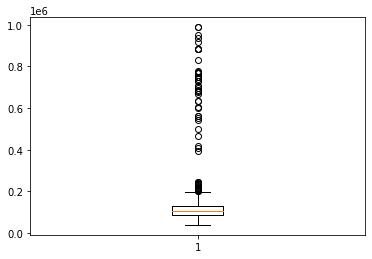

In [73]:
import matplotlib.pyplot as plt

# Create a box plot of the salary_estimate column


#There's a value which is way too higher than the others,
#Let's remove it

# Identify any outliers based on the box plot and remove them using boolean indexing
#df = df[df['Salary Estimate'] > 15080]
#df = df[df['Salary Estimate'] < 1000000]

plt.boxplot(df['Salary Estimate']);

#Values under 2M$ seem legit salaries

EDA

In [ ]:
# get summary statistics for numerical columns
print(df.describe())

In [ ]:
# check for missing values
print(df.isnull().sum())

#If we have some columns missing too many values, then, they might be not good to build a model

#Ex. seniority can be removed, same for revenue

In [ ]:
# plot a histogram of the Salary Estimate column
sns.histplot(data=df, x='Salary Estimate')
plt.title('Salary Estimate Distribution')
plt.show()

In [ ]:
#Plot a boxplot of the Salary Estimate Column

plt.boxplot(df['Salary Estimate']);

Analyzing numerical variables

In [ ]:
# plot a heatmap of correlations between numerical columns
numerical_cols = ['Salary Estimate', 'Rating', 'Vader']
sns.heatmap(data=df[numerical_cols].corr(), annot=True)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# plot a scatterplot of Salary Estimate vs. Rating

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Rating', y='Salary Estimate')
plt.xlabel('Company Rating')
plt.ylabel('Salary Estimate')
plt.title('Rating vs. Salary Estimate')
plt.show()


In [ ]:
# plot a scatterplot of Salary Estimate vs. Vader analysis on job description

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Vader', y='Salary Estimate')
plt.xlabel('Job Description Vader analysis')
plt.ylabel('Salary Estimate')
plt.title('Vader vs. Salary Estimate')
plt.show()


In [ ]:
#From the two graphs above, there seems to be very small correlation between rating and salary.
#Rating might not be an interesting variable to use in our model then

In [ ]:
df['Job Simplified'].value_counts()

In [ ]:
df['Seniority'].value_counts()

In [ ]:
df.columns

In [ ]:
df['Job State'].value_counts()

In [ ]:
df.columns

In [ ]:
df['Company Name']

In [ ]:
df.columns

Analyzing Categorical Variables

Let's first make a barplot for every categorical variable.
It's better to make a horizontal barplot because we have too many values for each category and it would be hard to visualize them

In [ ]:
categorical=['Location', 'Size', 'Industry', 'Sector', 'Revenue', 'Job State','Job Simplified', 'Seniority']

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 18))

# Loop through each categorical variable and plot the countplot
for i, categorical in enumerate(categorical):
    
    

    row = i // 2
    col = i % 2
    ax = axes[row, col]
    sns.barplot(y=categorical, x='count', data=df[categorical].value_counts().reset_index().rename(columns={categorical: 'count', 'index': categorical}), ax=ax)
    ax.set_title(categorical)
    ax.set(ylabel='')
    
fig.tight_layout()
plt.show()

We notice that there are too many values for some categorical values, so 
it would be better to just display the top 20

In [ ]:
categorical=['Location', 'Size', 'Industry', 'Sector', 'Revenue', 'Job State','Job Simplified', 'Seniority']

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 18))

# Loop through each categorical variable and plot the countplot
for i, categorical in enumerate(categorical):
    
    #sns.countplot(x=categorical, data=df,order=df[categorical].value_counts().iloc[:10].index, ax=ax)
    
    #ax.set_title(categorical)

    row = i // 2
    col = i % 2
    ax = axes[row, col]
    sns.barplot(y=categorical, x='count', data=df[categorical].value_counts().iloc[:20].reset_index().rename(columns={categorical: 'count', 'index': categorical}), ax=ax)
    ax.set_title(categorical)
    ax.set(ylabel='')
    
fig.tight_layout()
plt.show()

Let's look for some correlation between each categorical variable and the salary using boxplots where salaries are grouped by the values of each categorical variable

In [ ]:
categorical=['Location', 'Size', 'Industry', 'Sector', 'Revenue', 'Job State','Job Simplified', 'Seniority']

for category in categorical:
    plt.figure(figsize=(14, 8)) 
    sns.boxplot(data=df, x=category, y='Salary Estimate')
    plt.title(f'Salary Estimate by {category}')
    plt.xticks(rotation=45, ha='right') # rotate and align the x-axis labels
    plt.show()
    

In [ ]:
df['Job Simplified'].value_counts()

In [ ]:
#Let's look at some correlation between sector and salary
# plot a violin plot of Salary Estimate by Sector
plt.figure(figsize=(16, 12))  
sns.violinplot(data=df, x='Sector', y='Salary Estimate')
plt.xticks(rotation=45, ha='right')
plt.title('Salary Estimate by Sector', fontsize=18) 
plt.xlabel('Sector', fontsize=14)  
plt.ylabel('Salary Estimate', fontsize=14)  
plt.tick_params(labelsize=12)  
plt.show()

A chi-squared test to determine the independence between categorical variables

In [ ]:
categorical=['Location', 'Size', 'Industry', 'Sector', 'Revenue', 'Job State','Job Simplified', 'Seniority']


for i in range(len(categorical)):
    for j in range(i+1, len(categorical)):
        cross_tab = pd.crosstab(df[categorical[i]], df[categorical[j]])
        chi2, p, dof, expected = chi2_contingency(cross_tab)
        print(f'Chi-Squared Test p-value for {categorical[i]} and {categorical[j]}:', p)

In [ ]:
alpha = 0.05
for i, var1 in enumerate(categorical[:-1]):
    for var2 in categorical[i+1:]:
        cross = pd.crosstab(df[var1], df[var2])
        chi2, p, dof, expected = chi2_contingency(cross)
        if p < alpha:
            print(f"{var1} and {var2} are significantly associated with p-value {p:.3f}") #meaning they are somehow dependent

<h2 style=color:green>Correct Version</h2>

In [ ]:
# Select the columns of interest
cols_of_interest = ['Location', 'Size', 'Industry', 'Sector', 'Revenue', 'Job State', 'Job Simplified', 'Seniority', 'Salary Estimate']
data = df[cols_of_interest]


for col in ['Location', 'Size', 'Industry', 'Sector', 'Revenue', 'Job State', 'Job Simplified', 'Seniority']:
    cont_table = pd.crosstab(data[col], data['Salary Estimate'])
    stat, p, dof, expected = chi2_contingency(cont_table)
    print(f"Chi-squared test for {col}:")
    print(f"p-value = {p}")
    if p < 0.05:
        print(f"There is a significant association between {col} and the Salary Estimate.\n")
    else:
        print(f"There is no significant association between {col} and the Salary Estimate.\n")

In [ ]:
df.groupby('Job State')['Salary Estimate'].mean().sort_values(ascending=False).to_frame()

In [ ]:
df[df['Job State']=='ma']

In [ ]:
#define a function which draws the graphs, given a name, an order and a width of the figure

def make_grouped_and_count_ordered_graph(name, order, width=10):
    
        # group the data by Seniority and compute the mean of Salary Estimate for each group
    grouped_df = df.groupby(name)['Salary Estimate'].mean()

    count_df = df.groupby(name)[name].size()


    # map the seniority levels to their corresponding numerical values using a lambda function
    grouped_df.index = grouped_df.index.map(lambda x: order[x])
    count_df.index = count_df.index.map(lambda x: order[x])

    fig, ax1 = plt.subplots(figsize=(width, 6))

    # Plot the mean salary on the first subplot
    ax1.scatter(grouped_df.index, grouped_df.values, color='blue')
    ax1.set_xlabel(name)
    ax1.set_ylabel('Mean Salary Estimate', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    ax1.tick_params(axis='x')

    # Create a second axis with the same x-axis as the first subplot
    ax2 = ax1.twinx()

    # Plot the count of entries on the second subplot
    bar_width = 0.5
    ax2.bar(count_df.index, count_df.values, width=bar_width, color='orange', alpha=0.5)
    ax2.set_ylabel('Count of Entries', color='orange')
    ax2.tick_params(axis='y', labelcolor='orange')
    ax2.tick_params(axis='x', labelrotation=90)

    # Reverse the mapping and use the original seniority level names as the tick labels
    tick_labels = [level for level, value in sorted(order.items(), key=lambda x: x[1]) if value in grouped_df.index]
    ax1.set_xticks(sorted(grouped_df.index))
    ax1.set_xticklabels(tick_labels)

    #write the value in each point of the scatterplo
    for i, value in enumerate(grouped_df.values):
        ax1.annotate("{:.2f}".format(value), (grouped_df.index[i], value))

    # Adjust the x-axis tick labels and spacing
    plt.subplots_adjust(bottom=0.2)

    # Show the plot
    plt.show()


In [ ]:
seniority_order = {'jr': 0, 'associate': 1, 'senior': 2, 'manager': 3, 'executive': 4}
size_order = {'1 - 50': 0, '51 - 200': 1, '201 - 500': 2, '501 - 1000': 3, '1001 - 5000': 4, '5001 - 10000': 5, '10000+': 6}
revenue_order = {'0 - 1': 0, '1 - 5': 1, '5 - 25': 2, '25 - 100': 3, '100 - 500': 4, '500 - 1000': 5, '1000 - 5000': 6, '5000 - 10000': 7, '10000+':8}
make_grouped_and_count_ordered_graph('Seniority', seniority_order,15)
make_grouped_and_count_ordered_graph('Size', size_order,15)
make_grouped_and_count_ordered_graph('Revenue', revenue_order, 15)

In [ ]:
#let's give a look inside salaries in companies with 0 - 1 millions revenues
df[df['Revenue']=='0 - 1']

#some of them are exagerated: if a company get 1 million revenue cannot pay an employee more than 200000 $
#we implement this in the data cleaning function

In [ ]:
names = ['Sector','Industry','Job State', 'Job Simplified']
for name in names:
    #remove the rows whose size is less than 10: we need at least 10 values to be reliable!
    grouped_df = df.groupby(name)['Salary Estimate'].mean()
    count_df = df.groupby(name)[name].size()
    # Filter out groups with fewer than 10 entries
    count_df = count_df[count_df >= 10]
    grouped_df = grouped_df.loc[count_df.index]

    # Sort the table in descending order by salary
    grouped_df = grouped_df.sort_values(ascending=False)[:20]
    count_df = count_df.loc[grouped_df.index]

    # Create a figure with two subplots sharing the same x-axis
    fig, ax1 = plt.subplots(figsize=(20, 6))

    # Plot the mean salary on the first subplot
    ax1.scatter(grouped_df.index, grouped_df.values, color='blue')
    ax1.set_xlabel(name)
    ax1.set_ylabel('Mean Salary Estimate', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    ax1.tick_params(axis='x', labelrotation=90)

    # Create a second axis with the same x-axis as the first subplot
    ax2 = ax1.twinx()

    # Plot the count of entries on the second subplot
    bar_width = 0.5
    ax2.bar(count_df.index, count_df.values, width=bar_width, color='orange', alpha=0.5)
    ax2.set_ylabel('Count of Entries', color='orange')
    ax2.tick_params(axis='y', labelcolor='orange')
    ax2.tick_params(axis='x', labelrotation=90)
    # Adjust the x-axis tick labels and spacing
    plt.xticks(rotation=90, ha='center')
    plt.subplots_adjust(bottom=0.2)
    

    # Show the plot
    plt.show()

In [ ]:
df

In [ ]:
df.info()

ML Models

The first model implemented is Linear Regression

In [8]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Industry', 'Sector', 'Revenue',
       'Job State', 'Job Simplified', 'Seniority', 'Vader'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 951 entries, 0 to 1388
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Job Title        951 non-null    object 
 1   Salary Estimate  951 non-null    int64  
 2   Job Description  951 non-null    object 
 3   Rating           951 non-null    float64
 4   Company Name     951 non-null    object 
 5   Location         939 non-null    object 
 6   Size             797 non-null    object 
 7   Industry         762 non-null    object 
 8   Sector           762 non-null    object 
 9   Revenue          530 non-null    object 
 10  Job State        934 non-null    object 
 11  Job Simplified   951 non-null    object 
 12  Seniority        299 non-null    object 
 13  Vader            951 non-null    float64
dtypes: float64(2), int64(1), object(11)
memory usage: 111.4+ KB


We first choose which features to include in our model. 
Variables missing too many values are not going to be included (Revenue, Seniority)
Job Title and Job description are not going to be included. We're gonna use Job Simplified which is a simplified version of the job title and vader for the vader result of each job description

In [74]:
model_data=df[['Salary Estimate', 'Rating', 'Company Name', 'Location', 'Size', 'Industry', 'Sector', 'Job State', 'Job Simplified', 'Vader']]

Let's remove all rows having nan values

In [75]:
model_data.dropna(inplace=True)

In [76]:
model_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 710 entries, 2 to 1388
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Salary Estimate  710 non-null    int64  
 1   Rating           710 non-null    float64
 2   Company Name     710 non-null    object 
 3   Location         710 non-null    object 
 4   Size             710 non-null    object 
 5   Industry         710 non-null    object 
 6   Sector           710 non-null    object 
 7   Job State        710 non-null    object 
 8   Job Simplified   710 non-null    object 
 9   Vader            710 non-null    float64
dtypes: float64(2), int64(1), object(7)
memory usage: 61.0+ KB


Categorical Variables need to be turned into dummy variables

In [77]:
model_dummies=pd.get_dummies(model_data)

This is a supervised learning problem and our target variable is the Salary Estimate.

We need to split the dataset into training and test sets.

In [78]:
from sklearn.model_selection import train_test_split


X = model_dummies.drop(columns=['Salary Estimate'])
y = model_dummies['Salary Estimate'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [79]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 710 entries, 2 to 1388
Columns: 1046 entries, Rating to Job Simplified_statistician
dtypes: float64(2), uint8(1044)
memory usage: 740.5 KB


We now run our Linear Regression model including these variables

In [80]:
import statsmodels.api as sm

X_train = sm.add_constant(X_train)

# create a linear regression model and fit it to the training data
model = sm.OLS(y_train, X_train, missing='drop')
results = model.fit()

# print the summary of the model
print(results.summary())



                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     26.94
Date:                Tue, 18 Apr 2023   Prob (F-statistic):           6.03e-35
Time:                        10:24:26   Log-Likelihood:                -5904.9
No. Observations:                 568   AIC:                         1.281e+04
Df Residuals:                      67   BIC:                         1.499e+04
Df Model:                         500                                         
Covariance Type:            nonrobust                                         
                                                                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

In [82]:
# Compute MSE and MAE on training data

# make predictions on the train data
y_pred = results.predict(X_train)

train_mse = np.mean((y_train - y_pred)**2)
train_mae = np.mean(np.abs(y_train - y_pred))
print("Train MSE:", train_mse)
print("Train MAE:", train_mae)

Train MSE: 62701666.04070913
Train MAE: 2387.2968366823043


Let's see how it performs on the test set:

In [81]:
# make predictions on the test data
X_test = sm.add_constant(X_test)
y_pred = results.predict(X_test)

# calculate the R-squared value on the test data
SSres = np.sum((y_test - y_pred) ** 2)
SStot = np.sum((y_test - np.mean(y_test)) ** 2)
R2 = 1 - (SSres / SStot)
print("R-squared value on test data:", R2)


# Compute MSE and MAE on test data
test_mse = np.mean((y_test - y_pred)**2)
test_mae = np.mean(np.abs(y_test - y_pred))
print("Test MSE:", test_mse)
print("Test MAE:", test_mae)

R-squared value on test data: 0.21850701341915213
Test MSE: 6781886971.222912
Test MAE: 42113.358246520715


Let's try to improve our Linear regression model using Lasso Regression. 
Lasso regression is a type of linear regression that can be used for feature selection. It shrinks the regression coefficients towards zero, which can make some coefficients equal to zero and effectively remove those corresponding features from the model. This helps to prevent overfitting and can improve the model's predictive accuracy.We're also using cross validation to find the best value of the regularization parameter (alpha)

In [88]:
from sklearn.linear_model import Lasso, LassoCV
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Create a LassoCV object with a list of candidate alpha values to search
alphas = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100, 1000, 10000]
lasso_cv = LassoCV(alphas=alphas, fit_intercept=False, cv=5)

# Fit the LassoCV model to the training data
lasso_cv.fit(X_train, y_train)

# Print the best alpha value found by cross-validation
print("Best alpha:", lasso_cv.alpha_)

# Create a Lasso object with the best alpha value found by cross-validation
lasso = Lasso(alpha=lasso_cv.alpha_, fit_intercept=False)

# Fit the Lasso model to the training data
lasso.fit(X_train, y_train)

# Compute the predictions on the training and test sets
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

# Compute the mean squared error (MSE) and mean absolute error (MAE) on the training and test sets
mse_train = mean_squared_error(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)

# Print the MSE and MAE on the training and test sets
print("MSE on training set:", mse_train)
print("MAE on training set:", mae_train)
print("MSE on test set:", mse_test)
print("MAE on test set:", mae_test)


C:\Users\Lorenzo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.422e+10, tolerance: 1.096e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\Lorenzo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.044e+10, tolerance: 1.096e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\Lorenzo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.361e+10, to

C:\Users\Lorenzo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.528e+10, tolerance: 1.460e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\Lorenzo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.533e+10, tolerance: 1.460e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\Lorenzo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.343e+10, to

Best alpha: 100.0
MSE on training set: 565352020.3034095
MAE on training set: 18314.978891413517
MSE on test set: 5512200192.730462
MAE on test set: 29668.68834260611
